In [18]:
%pylab inline
from shapely.geometry import Polygon as shapelyPolygon
from shapely.geometry import box as shapelyRectangle

from pywsi.io.operations import get_annotation_bounding_boxes, get_annotation_polygons, \
    poly2mask, translate_and_scale_polygon, read_as_rgb

from pywsi.morphology.mask import mpl_polygon_to_shapely_scaled, get_common_interior_polygons
from descartes.patch import PolygonPatch
from matplotlib.collections import PatchCollection


Populating the interactive namespace from numpy and matplotlib


/home/saket/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
rect = shapelyRectangle(0.0, 0.0, 256.0, 256.0)

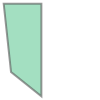

In [33]:
poly = shapelyPolygon([(225, 360), (240, 220), (290, 180), (350, 300)])
rect.intersection(poly)

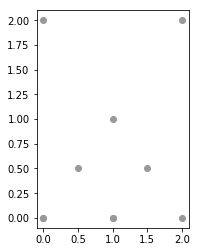

In [10]:
def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)
    
fig = plt.figure()

# 1: valid polygon
ax = fig.add_subplot(121)

ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]
polygon = shapelyPolygon(ext, [int])

plot_coords(ax, polygon.interiors[0])
plot_coords(ax, polygon.exterior)

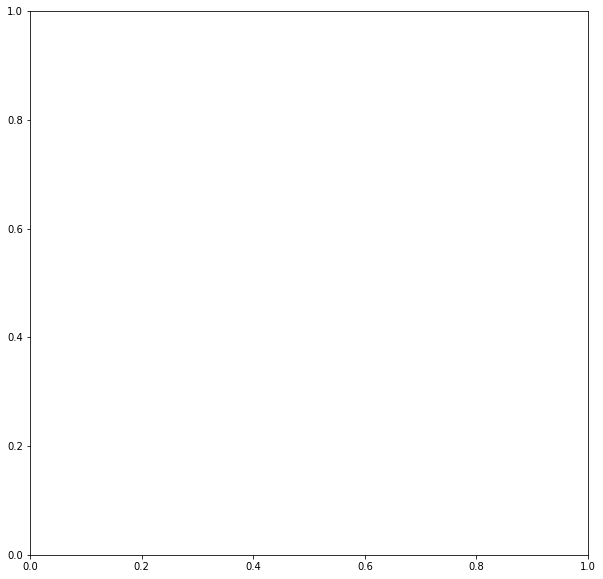

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
patch = PolygonPatch(rect, facecolor='#6699cc')#, edgecolor=v_color(polygon), alpha=0.5, zorder=2)
#ax.add_patch(patch)
patches = []
#patches.append(patch)

patch = PolygonPatch(rect.intersection(poly), facecolor='#ff3333')#, edgecolor=v_color(polygon), alpha=0.5, zorder=2)
ax.add_patch(patch)
patches.append(patch)

p = PatchCollection(patches, alpha=0.4)
#ax.add_collection(p)

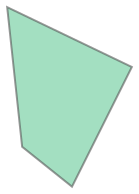

In [24]:
poly

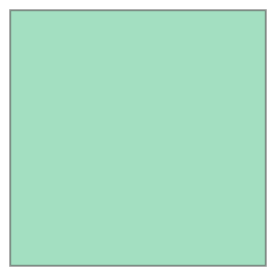

In [35]:
rect

In [40]:
poly = shapelyPolygon([(2250, 3600), (2400, 2200), (2900, 1800), (3500, 3000)])

x = rect.intersection(poly)
if (x):
    print(True)
else:
    print(False)

False


In [46]:
print(np.array(rect.interiors))

[]


In [49]:
print(list(rect.boundary.coords))

[(256.0, 0.0), (256.0, 256.0), (0.0, 256.0), (0.0, 0.0), (256.0, 0.0)]


In [50]:
x.is_empty

True

In [51]:
x.area

0.0

In [52]:
a = np.array([[1,2], [3,4]]) - np.array([1,2])

In [53]:
a

array([[0, 0],
       [2, 2]])

In [54]:
def extract_poly_coords(geom):
    if geom.type == 'Polygon':
        exterior_coords = geom.exterior.coords[:]
        interior_coords = []
        for interior in geom.interiors:
            interior_coords += interior.coords[:]
    elif geom.type == 'MultiPolygon':
        exterior_coords = []
        interior_coords = []
        for part in geom:
            epc = extract_poly_coords(part)  # Recursive call
            exterior_coords += epc['exterior_coords']
            interior_coords += epc['interior_coords']
    else:
        raise ValueError('Unhandled geometry type: ' + repr(geom.type))
    return {'exterior_coords': exterior_coords,
            'interior_coords': interior_coords}

In [55]:
extract_poly_coords(rect)

{'exterior_coords': [(256.0, 0.0),
  (256.0, 256.0),
  (0.0, 256.0),
  (0.0, 0.0),
  (256.0, 0.0)],
 'interior_coords': []}